# Patent Keyword Extraction Algorithm (PKEA) - Project

<img src= "https://biq.cloud/wp-content/uploads/2020/12/Keyword-research.gif" width="900" align="center">

## Summary of PKEA

- Patents are an important part of intellectual property. Patent mining can be divided into patent metadata mining and patent text mining. In this project, we are going to focus on patent text mining. Patent classification is the most important task in patent mining; we can use keywords to predict the classification of the patents. 

- PKEA is based on the skip-gram model for patent classification. It can be used to extract both semantic and discriminative keywords without the need of a corpus. It has low computational complexity meaning that it is easier to implement. High performance on extracting discriminative keywords. Easy to implement and apply to other type of texts. The biggest drawback is that it requires a pre-defined category corpus. It is specially designed for extracting keywords from patent text. Easy to extend to other scientific articles. 

- All the keyword-based patent mining techniques are based on the assumption that the keywords can represent the corresponding patent document well. Quality of advanced patent analysis relies on the quality of the extracted keywords. 

- Best performances achieved on SemEval-2010 and Hulth2003 are 27.2% and 38.7% respectively. 

- Some of the issues include: redundant expression, polysemy, synonyms, thesaurus updating dynamically & interdisciplinary content complexity. 

- Deep learning based keyword extraction and keyword extraction based on the Skip-gram model. 

- Both RAKE and PKEA are unsupervised models 

- Skip-Gram Model (Word2Vec) is applied to training corpus to pre-train word embeddings. After pre-training Word2VecTales is obtained by applying the skip-gram model. Patents in each category, the correspondng words are converted to vectors. K-means algorithm is used to generate the centroid vector. After obtaining centroid vector, each candidate keywords list is converted to a vectors list. The similarity values between candidate keyword to centroid vector is calculated using cosine similarity. Finally the top n keywords for each patent document is obtained by sorting the KeywordsDict by value. The keywords are extracted from patent texts by applying PKEA.

<br>

**Algorithm of PKEA**

1. Skip-gram model is applied to the training corpus to pre-train word embeddings. 
2. K-means algorithm is applied to generate centroid vector. 
3. The similarity values between each candidate word to centroid vector is calculated using cosine similarity. 
4. The top n keywords for each patent are obtained by sorting the KeywordsDict by value. 
5. The evaluation criteria uses two: IG (Information Gain) and SVM (Support Vector Machine)

<br> 
Source: https://www.mdpi.com/259930

## Analytic Approach 

The approach considered for this project is to conduct a descriptive statistics analyisis. The goal is to ensure that PKEA is implemented on the documents to extract meaningful patent-related terminology based on the candidate words. 

## Data Requirements & Collection

The type of datasets that can be used for this particular approach can be in the form of pdf, csv files and json files. In this notebook, we will be exploring the scientific paper (datasets) with csv files as they are much more easier in extracting words. The csv files can be converted into text or txt files for Skip-gram Model, Centroid Vector and Cosine Similarity. It is preferable to have the dataset in a csv for further analysis.

### Note:
In this project, I have used 4 csv files and 1 paragraph from patent document from https://www.uspto.gov/patents/basics/types-patent-applications/utility-patent/business-methods-2 to test the functionality of the methods. 

## Coding

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import nltk
import PyPDF2
import operator
import re
import string
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns 
import warnings
import math
import tabula
import io
import keras
import sklearn
sns.set()

from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics import pairwise_distances
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import svm
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import brown
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing.sequence import skipgrams 
from tensorflow.keras.layers import Dense, Reshape, Embedding, Activation, Flatten, Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from gensim.models import Word2Vec
from collections import Counter
from collections import defaultdict
from numpy.linalg import norm
from scipy.stats import norm
from wordcloud import WordCloud
from string import punctuation
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from multiprocessing import Pool
from scipy import spatial
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

### Load corpus and reading the dataset

<br> There are 4 csv files (Jeopardy.csv, lenses.data, badges.data, papers.csv, ) along with a paragraph that is scraped from https://www.uspto.gov/patents/basics/types-patent-applications/utility-patent/business-methods-2. Since my program kept crashing everytime I used Jeopardy.csv (due to the size of the file), I have refrained from using it for testing. 

I have used a string (patent paragraph as input to test this program). I have also written the code for how to make it work with csv files. 

In [3]:
badges_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/badges/badges.data'

dfb = pd.read_csv(badges_url)

In [4]:
lenses_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data'
dfl = pd.read_csv(lenses_url)

In [5]:
df = pd.read_csv('papers.csv', encoding='unicode_escape')

In [6]:
df

,paper_id,title,keywords,abstract,session,year
0,1,Ensemble Statistical and Heuristic Models for ...,"statistical word alignment, ensemble learning,...",Statistical word alignment models need large a...,Ensemble Methods,2014
1,2,Improving Spectral Learning by Using Multiple ...,"representation, spectral learning, discrete fo...",Spectral learning algorithms learn an unknown ...,Ensemble Methods,2014
2,3,Applying Swarm Ensemble Clustering Technique f...,"software defect prediction, particle swarm opt...",Number of defects remaining in a system provid...,Ensemble Methods,2014
3,4,Reducing the Effects of Detrimental Instances,"filtering, label noise, instance weighting",Not all instances in a data set are equally be...,Ensemble Methods,2014
4,5,Concept Drift Awareness in Twitter Streams,"twitter, adaptation models, time-frequency ana...",Learning in non-stationary environments is not...,Ensemble Methods,2014
...,...,...,...,...,...,...
443,444,A Machine Learning Tool for Supporting Advance...,"machine-learning,unsupervised-learning,knowled...","In the current era of big data, high volumes o...",Machine Learning on Big Data,2017
444,445,Advanced ECHMM-Based Machine Learning Tools fo...,"workload characterization,hmm,cepstral coeffic...",We present a novel approach for accurate chara...,Machine Learning on Big Data,2017
445,446,A Cluster Analysis of Challenging Behaviors in...,"cluster analysis,autism spectrum disorder,chal...","We apply cluster analysis to a sample of 2,116...",Machine Learning Applications in Psychiatric R...,2017
446,447,Predicting Psychosis Using the Experience Samp...,"predicting psychosis,esm,mhealth,svm,gaussian ...",Smart phones have become ubiquitous in the rec...,Machine Learning Applications in Psychiatric R...,2017


In [7]:
df.shape

(448, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   paper_id  448 non-null    int64 
 1   title     448 non-null    object
 2   keywords  448 non-null    object
 3   abstract  448 non-null    object
 4   session   448 non-null    object
 5   year      448 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 21.1+ KB


In [9]:
df.describe()

,paper_id,year
count,448.000000,448.000000
mean,224.500000,2015.470982
std,129.470717,1.088503
min,1.000000,2014.000000
25%,112.750000,2015.000000
50%,224.500000,2015.000000
75%,336.250000,2016.000000
max,448.000000,2017.000000


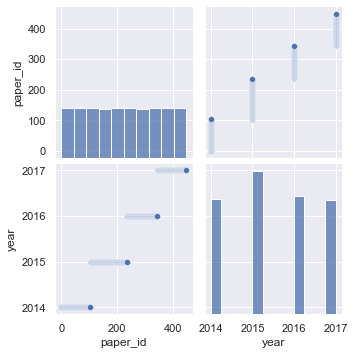

In [10]:
sns.pairplot(df)

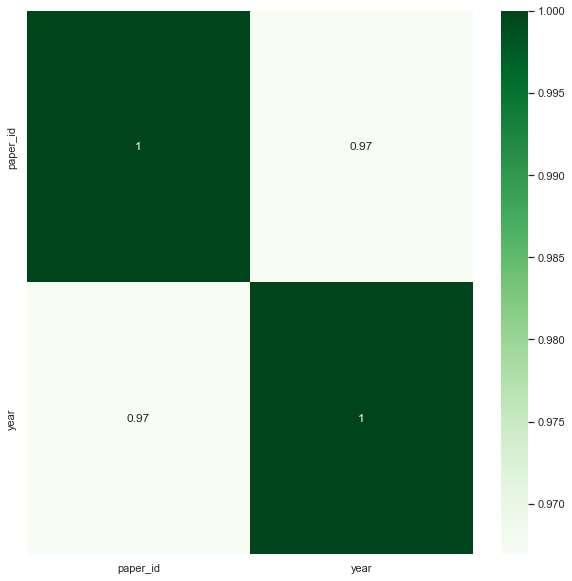

In [11]:
plt.figure(figsize= (10, 10))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap= 'Greens')
plt.show()

In [12]:
with open('papers.csv', 'r') as csvfile:
    csvtext = csvfile.readlines()

mylist = []
for line in csvtext:
    mylist.append(tuple(line.strip().split(', ')))
print(mylist)

[('paper_id,title,keywords,abstract,session,year',), ('1,Ensemble Statistical and Heuristic Models for Unsupervised Word Alignment,"statistical word alignment', 'ensemble learning', 'heuristic word alignment","Statistical word alignment models need large amount of training data while they are weak in small-size corpora. This paper proposes a new approach of unsupervised hybrid word alignment technique using ensemble learning method. This algorithm uses three base alignment models in several rounds to generate alignments. The ensemble algorithm uses a weighed scheme for resampling training data and a voting score to consider aggregated alignments. The underlying alignment algorithms used in this study include IBM Model 1', '2 and a heuristic method based on Dice measurement. Our experimental results show that by this approach', 'the alignment error rate could be improved by at least %15 for the base alignment models.",Ensemble Methods,2014'), ('2,Improving Spectral Learning by Using Mul

**Below is string containing text from a patent document**

In [13]:
text = "The invention relates to a book-keeping machine intended for the calculation and recording of new balances resulting from old balances of an account and the amounts received and paid out. A balance mechanism, which in known manner comprises two kinds of counting wheels, viz. adding and subtracting wheels, serves for the calculation of the new balances."

**NOTE: After this step, the user can decide which type of file they would like to use for extracting the keywords.**

### Skip-gram Model

**1. Skip-gram model is applied to the training Corpus to pre-train word embeddings, Word2VecTable is obtained. Each word is converted to a vector.**

In [14]:
import re

def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

tokens = tokenize(text)

In [15]:
def mapping(tokens):
    word_to_id = {}
    id_to_word = {}
    
    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token
    
    return word_to_id, id_to_word

word_to_id, id_to_word = mapping(tokens)
word_to_id

{'calculation': 0,
 'relates': 1,
 'account': 2,
 'out': 3,
 'known': 4,
 'of': 5,
 'wheels': 6,
 'balances': 7,
 'recording': 8,
 'two': 9,
 'book': 10,
 'manner': 11,
 'keeping': 12,
 'paid': 13,
 'the': 14,
 'received': 15,
 'adding': 16,
 'old': 17,
 'new': 18,
 'in': 19,
 'resulting': 20,
 'an': 21,
 'and': 22,
 'mechanism': 23,
 'comprises': 24,
 'viz': 25,
 'a': 26,
 'which': 27,
 'intended': 28,
 'counting': 29,
 'balance': 30,
 'from': 31,
 'invention': 32,
 'kinds': 33,
 'serves': 34,
 'for': 35,
 'to': 36,
 'amounts': 37,
 'subtracting': 38,
 'machine': 39}

In [16]:
np.random.seed(42)

def generate_training_data(tokens, word_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)
    
    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i), 
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))
    
    return np.asarray(X), np.asarray(y)

def concat(*iterables):
    for iterable in iterables:
        yield from iterable
        
def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

In [17]:
X, y = generate_training_data(tokens, word_to_id, 2)

In [18]:
X.shape

(222, 40)

In [19]:
y.shape

(222, 40)

In [20]:
def init_network(vocab_size, n_embedding):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    return model

model = init_network(len(word_to_id), 10)


def forward(model, X, return_cache=True):
    cache = {}
    
    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])
    
    if not return_cache:
        return cache["z"]
    return cache


def softmax(X):
    res = []
    for x in X:
        exp = np.exp(x)
        res.append(exp / exp.sum())
    return res

In [21]:
(X @ model["w1"]).shape

(222, 10)

In [22]:
(X @ model["w1"] @ model["w2"]).shape

(222, 40)

In [23]:
def backward(model, X, y, alpha):
    cache  = forward(model, X)
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    return cross_entropy(cache["z"], y)

In [24]:
def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)

learning = one_hot_encode(word_to_id["balance"], len(word_to_id))
result = forward(model, [learning], return_cache=False)[0]

for word in (id_to_word[id] for id in np.argsort(result)[::-1]):
    print(word)

the
book
received
keeping
amounts
balance
relates
machine
old
counting
invention
subtracting
manner
a
recording
mechanism
known
two
and
new
for
balances
from
in
calculation
out
which
account
kinds
comprises
adding
an
to
viz
intended
resulting
of
wheels
serves
paid


In [25]:
model

{'w1': array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
         -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004],
        [-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
         -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
        [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
          0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375],
        [-0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
         -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124],
        [ 0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
         -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016],
        [ 0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
          0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513],
        [-0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
          1.35624003, -0.0

In [26]:
print('Type of corpus: ', type(text))
print('Length of corpus: ', len(text))

text_obj = text.split()
type(text_obj)

Type of corpus:  <class 'str'>
Length of corpus:  354


list

In [27]:
for i in range(len(text_obj)):
    text_obj[i] = [word.lower() for word in text_obj[i] if re.match('^[a-zA-Z]+', word)]  
    
def get_embedding(model, word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print("`Word` not in Corpus")
    one_hot = one_hot_encode(idx, len(word_to_id))
    return forward(model, one_hot) ["a1"]

In [28]:
get_embedding(model, "manner")

array([-1.91877122, -0.02651388,  0.06023021,  2.46324211, -0.19236096,
        0.30154734, -0.03471177, -1.16867804,  1.14282281,  0.75193303])

In [29]:
get_embedding(model, "mechanism")

array([-0.73036663,  0.21645859,  0.04557184, -0.65160035,  2.14394409,
        0.63391902, -2.02514259,  0.18645431, -0.66178646,  0.85243333])

In [30]:
get_embedding(model, "balance")

array([-0.82899501, -0.56018104,  0.74729361,  0.61037027, -0.02090159,
        0.11732738,  1.2776649 , -0.59157139,  0.54709738, -0.20219265])

**Another version of Skip-gram Model**

In [31]:
import numpy as np
import keras.backend as K
import tensorflow as tf
import operator
from tensorflow import keras
from keras.utils import np_utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Reshape, Lambda
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import sequence
from sklearn.metrics.pairwise import cosine_distances

from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors as nn
from matplotlib import pylab
import pandas as pd

In [32]:
file_name = 'patent.txt'
corpus = open(file_name).readlines()

In [33]:
# Remove sentences with fewer than 3 words
corpus = [sentence for sentence in corpus if sentence.count(" ") >= 2]

# Remove punctuation in text and fit tokenizer on entire corpus
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'+"'")
tokenizer.fit_on_texts(corpus)

# Convert text to sequence of integer values
corpus = tokenizer.texts_to_sequences(corpus)
n_samples = sum(len(s) for s in corpus) # Total number of words in the corpus
V = len(tokenizer.word_index) + 1 # Total number of unique words in the corpus

In [34]:
n_samples, V

(598, 197)

In [35]:
print(list((tokenizer.word_index.items())))

[('the', 1), ('of', 2), ('in', 3), ('is', 4), ('wheels', 5), ('to', 6), ('and', 7), ('balance', 8), ('mechanism', 9), ('by', 10), ('a', 11), ('which', 12), ('or', 13), ('counting', 14), ('amounts', 15), ('subtracting', 16), ('being', 17), ('adding', 18), ('that', 19), ('negative', 20), ('positive', 21), ('complementary', 22), ('upon', 23), ('transfer', 24), ('invention', 25), ('for', 26), ('new', 27), ('from', 28), ('paid', 29), ('out', 30), ('key', 31), ('operation', 32), ('totalizers', 33), ('one', 34), ('accumulated', 35), ('companion', 36), ('order', 37), ('machine', 38), ('balances', 39), ('two', 40), ('serves', 41), ('effected', 42), ('depression', 43), ('motor', 44), ('control', 45), ('into', 46), ('taking', 47), ('total', 48), ('selected', 49), ('coupled', 50), ('may', 51), ('amount', 52), ('as', 53), ('unit', 54), ('exceeded', 55), ('1', 56), ('units', 57), ('tens', 58), ('calculation', 59), ('old', 60), ('an', 61), ('operations', 62), ('coupling', 63), ('with', 64), ('side', 

In [36]:
window_size = 2 
window_size_corpus = 4

np.random.seed(42)

In [37]:
def generate_data_skipgram(corpus, window_size, V):
    maxlen = window_size * 2
    all_in = []
    all_out = []
    for words in corpus:
        L = len(words)
        for index, word in enumerate(words):
            p = index - window_size
            n = index + window_size + 1

            in_words = []
            labels = []
            for i in range(p, n):
                if i != index and 0 <= i < L:
                    
                    all_in.append(word)
                   
                    all_out.append(to_categorical(words[i], V))

    return (np.array(all_in), np.array(all_out))

In [38]:
X_skip, y_skip = generate_data_skipgram(corpus, window_size, V)
X_skip.shape, y_skip.shape

((2362,), (2362, 197))

In [39]:
dims = [50, 150, 300]
skipgram_models = []

for dim in dims:
    skipgram = Sequential()

    skipgram.add(Embedding(input_dim=V, 
                           output_dim=dim, 
                           input_length=1, 
                           embeddings_initializer='glorot_uniform'))

    skipgram.add(Reshape((dim, )))

    skipgram.add(Dense(V, activation='softmax', kernel_initializer='glorot_uniform'))

    skipgram.compile(optimizer=keras.optimizers.Adam(),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    
    skipgram.summary()
    print("")
    skipgram_models.append(skipgram)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 50)             9850      
                                                                 
 reshape (Reshape)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 197)               10047     
                                                                 
Total params: 19,897
Trainable params: 19,897
Non-trainable params: 0
_________________________________________________________________

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 150)            29550     
                                                                 
 reshape_1 (Reshape)         

In [40]:
for skipgram in skipgram_models:
    skipgram.fit(X_skip, y_skip, batch_size=64, epochs=13, verbose=1)
    print("")

Epoch 1/13
37/37 [==============================] - 1s 2ms/step - loss: 5.2717 - accuracy: 0.0186
Epoch 2/13
37/37 [==============================] - 0s 2ms/step - loss: 5.2279 - accuracy: 0.0593
Epoch 3/13
37/37 [==============================] - 0s 2ms/step - loss: 5.1836 - accuracy: 0.1003
Epoch 4/13
37/37 [==============================] - 0s 2ms/step - loss: 5.1329 - accuracy: 0.1274
Epoch 5/13
37/37 [==============================] - 0s 2ms/step - loss: 5.0723 - accuracy: 0.1469
Epoch 6/13
37/37 [==============================] - 0s 2ms/step - loss: 4.9982 - accuracy: 0.1528
Epoch 7/13
37/37 [==============================] - 0s 2ms/step - loss: 4.9091 - accuracy: 0.1524
Epoch 8/13
37/37 [==============================] - 0s 2ms/step - loss: 4.8060 - accuracy: 0.1545
Epoch 9/13
37/37 [==============================] - 0s 2ms/step - loss: 4.6982 - accuracy: 0.1562
Epoch 10/13
37/37 [==============================] - 0s 2ms/step - loss: 4.5934 - accuracy: 0.1571
Epoch 11/13
37/37 [

In [41]:
for skipgram in skipgram_models:
    # Save embeddings for vectors of length 50, 150 and 300 using skipgram model
    weights = skipgram.get_weights()

    # Get the embedding matrix
    embedding = weights[0]
    
    for word, i in tokenizer.word_index.items():
        print(word)
        print(" ")
        print(" ".join(map(str, list(embedding[i,:]))))
        print("\n")

the
 
0.2892957 -0.25355318 -0.013791776 -0.4445138 -0.05648045 0.28628093 0.2668266 -0.020464003 0.15107577 0.2151705 0.17593296 -0.001971225 -0.25103453 0.48747358 -0.13300581 0.1155196 0.3910345 -0.35063702 -0.35639778 0.052871913 0.09039845 0.36237225 0.09272434 -0.4160203 -0.21303082 -0.105677456 0.16831706 -0.2739358 0.013051548 -0.1681286 -0.18211336 0.07174127 0.075156756 0.2612517 -0.15099771 0.5019196 -0.14575271 0.16077383 -0.36513937 0.5037965 -0.29633197 0.26096812 -0.18210831 0.31991005 -0.020042302 -0.17212467 -0.3107073 -0.30440116 0.24508344 0.182259


of
 
0.10029786 -0.37465155 0.36877376 -0.3154347 -0.21478151 -0.10891139 -0.2061704 -0.39936143 0.2554141 0.020555645 -0.25694644 0.0040466767 0.16053389 0.19675994 -0.14696346 -0.099637 0.12373244 0.19866969 0.020761492 0.11828848 0.3196782 0.48662224 -0.40949234 -0.035235245 0.009565745 -0.33533213 -0.22513387 0.2802261 -0.28526866 -0.20189713 0.3658549 -0.29593226 -0.33687767 0.4161752 0.2881867 0.26605344 0.30992928

an
 
-0.00044548168 -0.14668077 0.017896228 -0.1744502 0.066134356 -0.095533274 -0.026494108 0.10879168 0.00815331 -0.062283617 -0.2652024 0.13371699 0.13230933 0.13765478 -0.23512334 -0.13732046 -0.040487237 -0.029585857 -0.013350665 0.08193869 -0.1885958 0.031012475 -0.045705184 -0.093465194 0.10959116 -0.17472456 -0.0077697607 -0.0893376 0.15662116 -0.09762108 -0.019356536 -0.14515574 0.11607452 0.036830563 -0.11618419 0.021896988 0.12157863 0.0044853566 -0.0067510772 -0.023182062 0.06702634 -0.064317904 -0.042780124 0.03675382 -0.22134842 0.0030041893 -0.023860252 -0.06869879 -0.033077486 -0.010666457 -0.061613955 -0.06415793 0.006293675 0.09579282 -0.13319093 0.25107542 0.112747565 -0.20581327 0.030937536 -0.016193798 0.19258279 -0.015493708 -0.0295669 -0.22004335 -0.22542778 0.097182095 0.041778207 -0.1184514 0.055423036 -0.02207332 -0.16449636 -0.057807226 0.07070974 -0.030931817 0.25135744 -0.04547239 0.13107474 -0.038479622 -0.11184297 0.27938822 -0.11698855 0.039611246 -0.247

In [42]:
len(embedding)

197

## Centroid Vector

**K-means algorithm is applied to generate centroid vector. After centroid vector is obtained, each candidate keywords list is converted to vectors list.**

In [43]:
features, true_labels = make_blobs(n_samples=200,centers=3,cluster_std=2.75,random_state=42)

In [44]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [45]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [46]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [47]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [48]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)

In [49]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [50]:
kmeans.inertia_

74.57960106819854

In [51]:
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [52]:
kmeans.n_iter_

2

In [53]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1])

In [54]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [ ]:
ds = np.array(text_obj)

In [56]:
ds

array([list(['t', 'h', 'e']),
       list(['i', 'n', 'v', 'e', 'n', 't', 'i', 'o', 'n']),
       list(['r', 'e', 'l', 'a', 't', 'e', 's']), list(['t', 'o']),
       list(['a']),
       list(['b', 'o', 'o', 'k', 'k', 'e', 'e', 'p', 'i', 'n', 'g']),
       list(['m', 'a', 'c', 'h', 'i', 'n', 'e']),
       list(['i', 'n', 't', 'e', 'n', 'd', 'e', 'd']),
       list(['f', 'o', 'r']), list(['t', 'h', 'e']),
       list(['c', 'a', 'l', 'c', 'u', 'l', 'a', 't', 'i', 'o', 'n']),
       list(['a', 'n', 'd']),
       list(['r', 'e', 'c', 'o', 'r', 'd', 'i', 'n', 'g']),
       list(['o', 'f']), list(['n', 'e', 'w']),
       list(['b', 'a', 'l', 'a', 'n', 'c', 'e', 's']),
       list(['r', 'e', 's', 'u', 'l', 't', 'i', 'n', 'g']),
       list(['f', 'r', 'o', 'm']), list(['o', 'l', 'd']),
       list(['b', 'a', 'l', 'a', 'n', 'c', 'e', 's']), list(['o', 'f']),
       list(['a', 'n']), list(['a', 'c', 'c', 'o', 'u', 'n', 't']),
       list(['a', 'n', 'd']), list(['t', 'h', 'e']),
       list(['a', '

### K - means if using a CSV file

In [57]:
def initiate_centroids(k, dset):
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=3
#df = df_2[['title','abstract']]
#centroids = initiate_centroids(k, df)
#centroids

In [58]:
def rsserr(a,b):
    return np.square(np.sum((a-b)**2)) 

In [59]:
from math import sqrt, floor
import numpy as np


def random(mylist, k, random_state=42):

    np.random.seed(random_state)
    centroids = []
    m = np.shape(mylist)[0]

    for _ in range(k):
        r = np.random.randint(0, m-1)
        centroids.append(mylist[r])

    return np.array(centroids)


def plus_plus(mylist, k, random_state=42):

    np.random.seed(random_state)
    centroids = [mylist[0]]

    for _ in range(1, k):
        dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in mylist])
        probs = dist_sq/dist_sq.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()
        
        for j, p in enumerate(cumulative_probs):
            if r < p:
                i = j
                break
        
        centroids.append(mylist[i])

    return np.array(centroids)


def naive_sharding(mylist, k):

    def _get_mean(sums, step):
        return sums/step

    n = np.shape(mylist)[1]
    m = np.shape(mylist)[0]
    centroids = np.zeros((k, n))

    composite = np.mat(np.sum(mylist, axis=1))
    mylist = np.append(composite.T, mylist, axis=1)
    mylist.sort(axis=0)

    step = floor(m/k)
    vfunc = np.vectorize(_get_mean)

    for j in range(k):
        if j == k-1:
            centroids[j:] = vfunc(np.sum(mylist[j*step:,1:], axis=0), step)
        else:
            centroids[j:] = vfunc(np.sum(mylist[j*step:(j+1)*step,1:], axis=0), step)

    return centroids

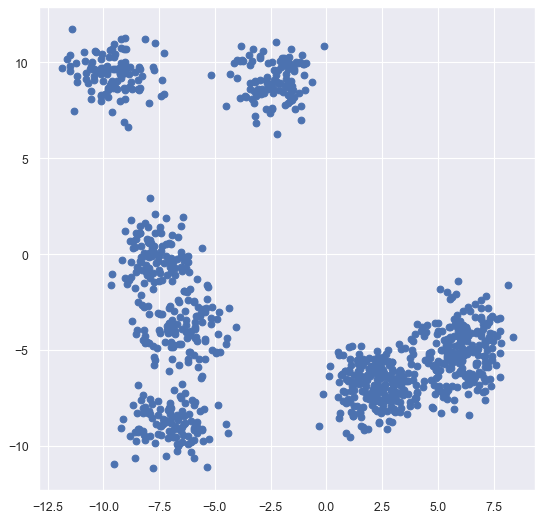

In [60]:
from sklearn.datasets import make_blobs

n_samples = 1000
n_features = 5
n_clusters = 9
random_state = 42
max_iter = 1000

X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=n_clusters, 
                  random_state=random_state)

fig=plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X[:, 0], X[:, 1]);

In [61]:
random(X, n_clusters)

array([[-5.641673  , -6.47352352, -0.23638477, -2.38429514, -5.20535187],
       [ 7.81773065, -4.62620514, -8.63182452,  2.44430628, -0.90330135],
       [-1.68609265,  9.90669695,  4.73549928,  1.08835374, -6.59268593],
       [-7.04566366, -2.80485278, -0.68827756, -2.98998981, -2.90292975],
       [-1.11346569,  7.70463684,  2.72610126,  2.91445426, -6.85193626],
       [ 5.5705822 , -4.39539859, -7.58677714,  3.50984017, -2.52613526],
       [ 5.96747235, -5.67473498, -7.18583304,  1.8807714 , -1.02674808],
       [ 2.43026532, -5.89047829, -2.33788385, -2.63282674, -1.11654386],
       [-8.30201015, -0.14566671, -8.8231457 ,  8.33727991, -4.44409353]])

In [62]:
plus_centroids = plus_plus(X, n_clusters)

In [63]:
print(plus_centroids)

[[-5.5729712  -3.53361658  1.13172496 -1.30274862 -4.9202014 ]
 [-9.23966577  7.98737255  5.47438229 -6.28099465 -5.59206166]
 [ 0.83871456 -6.08680263 -9.04726159  8.48165843  9.90828472]
 [-7.50397271 -0.80336658 -8.79072705  8.01407788 -6.18445502]
 [ 6.26963236 -3.80207079 -6.65193233  2.63944617 -1.59334565]
 [-3.13572181  6.82215607  5.49128093  0.98523384 -6.85100663]
 [-0.95633785  8.57476825  4.23196348  2.23479274 -6.86748068]
 [ 1.11991657 -8.22221767 -3.78053301 -1.86290529 -1.52799201]
 [-5.94227129 -9.67843784  7.48822074  1.65976521  4.74525193]]


In [64]:
type(plus_centroids)

numpy.ndarray

In [65]:
naive_centroids = naive_sharding(X, n_clusters)
print(naive_centroids)

[[-9.73274977 -9.06624027 -9.9206013  -5.87628711 -9.28748942]
 [-8.10257581 -7.56520836 -8.79345491 -2.90183588 -7.35918175]
 [-7.00632052 -6.55966773 -7.43607715 -1.21437895 -6.10491318]
 [-5.80108583 -5.6246989  -4.07560288  0.83730873 -4.97641281]
 [-2.37009281 -4.60902056 -0.29677646  1.83289794 -3.80668281]
 [ 1.43330812 -3.21670683  1.18995505  2.65966984 -1.68349844]
 [ 2.99711266 -0.09702744  4.48356992  3.91209801 -0.24733792]
 [ 5.22897211  8.45328189  6.33120227  7.77886528  4.24150551]
 [ 6.8874226  10.11288533  7.90780735  9.46772453  9.32418114]]


In [66]:
type(naive_centroids)

numpy.ndarray

In [67]:
centroids = np.concatenate((plus_centroids, naive_centroids))

In [68]:
centroids

array([[-5.5729712 , -3.53361658,  1.13172496, -1.30274862, -4.9202014 ],
       [-9.23966577,  7.98737255,  5.47438229, -6.28099465, -5.59206166],
       [ 0.83871456, -6.08680263, -9.04726159,  8.48165843,  9.90828472],
       [-7.50397271, -0.80336658, -8.79072705,  8.01407788, -6.18445502],
       [ 6.26963236, -3.80207079, -6.65193233,  2.63944617, -1.59334565],
       [-3.13572181,  6.82215607,  5.49128093,  0.98523384, -6.85100663],
       [-0.95633785,  8.57476825,  4.23196348,  2.23479274, -6.86748068],
       [ 1.11991657, -8.22221767, -3.78053301, -1.86290529, -1.52799201],
       [-5.94227129, -9.67843784,  7.48822074,  1.65976521,  4.74525193],
       [-9.73274977, -9.06624027, -9.9206013 , -5.87628711, -9.28748942],
       [-8.10257581, -7.56520836, -8.79345491, -2.90183588, -7.35918175],
       [-7.00632052, -6.55966773, -7.43607715, -1.21437895, -6.10491318],
       [-5.80108583, -5.6246989 , -4.07560288,  0.83730873, -4.97641281],
       [-2.37009281, -4.60902056, -0.2

In [69]:
import numpy as np
from sklearn.cluster import AffinityPropagation
import distance
    
words = text.split(" ") #Replace this line
words = np.asarray(words) #So that indexing with a list will work
lev_similarity = -1*np.array([[distance.levenshtein(w1,w2) for w1 in words] for w2 in words])

affprop = AffinityPropagation(affinity="precomputed", damping=0.5)
affprop.fit(lev_similarity)
for cluster_id in np.unique(affprop.labels_):
    exemplar = words[affprop.cluster_centers_indices_[cluster_id]]
    cluster = np.unique(words[np.nonzero(affprop.labels_==cluster_id)])
    cluster_str = ", ".join(cluster)
    print(" - *%s:* %s" % (exemplar, cluster_str))

 - *book-keeping:* book-keeping
 - *intended:* intended, invention, received
 - *calculation:* calculation
 - *and:* a, adding, an, and, in, kinds, paid
 - *new:* known, manner, new
 - *balances:* balance, balances, balances., relates
 - *resulting:* counting, recording, resulting
 - *account:* account, amounts
 - *mechanism,:* mechanism,
 - *comprises:* comprises
 - *wheels,:* wheels,
 - *subtracting:* subtracting
 - *the:* The, machine, serves, the, to, two, which
 - *of:* A, for, from, of, old, out., viz.


## Cosine Similarity 

**The similarity values between each candidate word to centroid vector is calculated using cosine similarity.**

In [70]:
docs = text
tokenized_documents = [re.findall(r'\w+', d.lower()) for d in docs]
tokenized_documents

[['t'],
 ['h'],
 ['e'],
 [],
 ['i'],
 ['n'],
 ['v'],
 ['e'],
 ['n'],
 ['t'],
 ['i'],
 ['o'],
 ['n'],
 [],
 ['r'],
 ['e'],
 ['l'],
 ['a'],
 ['t'],
 ['e'],
 ['s'],
 [],
 ['t'],
 ['o'],
 [],
 ['a'],
 [],
 ['b'],
 ['o'],
 ['o'],
 ['k'],
 [],
 ['k'],
 ['e'],
 ['e'],
 ['p'],
 ['i'],
 ['n'],
 ['g'],
 [],
 ['m'],
 ['a'],
 ['c'],
 ['h'],
 ['i'],
 ['n'],
 ['e'],
 [],
 ['i'],
 ['n'],
 ['t'],
 ['e'],
 ['n'],
 ['d'],
 ['e'],
 ['d'],
 [],
 ['f'],
 ['o'],
 ['r'],
 [],
 ['t'],
 ['h'],
 ['e'],
 [],
 ['c'],
 ['a'],
 ['l'],
 ['c'],
 ['u'],
 ['l'],
 ['a'],
 ['t'],
 ['i'],
 ['o'],
 ['n'],
 [],
 ['a'],
 ['n'],
 ['d'],
 [],
 ['r'],
 ['e'],
 ['c'],
 ['o'],
 ['r'],
 ['d'],
 ['i'],
 ['n'],
 ['g'],
 [],
 ['o'],
 ['f'],
 [],
 ['n'],
 ['e'],
 ['w'],
 [],
 ['b'],
 ['a'],
 ['l'],
 ['a'],
 ['n'],
 ['c'],
 ['e'],
 ['s'],
 [],
 ['r'],
 ['e'],
 ['s'],
 ['u'],
 ['l'],
 ['t'],
 ['i'],
 ['n'],
 ['g'],
 [],
 ['f'],
 ['r'],
 ['o'],
 ['m'],
 [],
 ['o'],
 ['l'],
 ['d'],
 [],
 ['b'],
 ['a'],
 ['l'],
 ['a'],
 ['n'],
 ['c'],
 ['e

In [71]:
lexicon = sorted(set(sum(tokenized_documents, [])))

lexicon

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'z']

In [72]:
from collections import OrderedDict

vector_template = OrderedDict((token, 0) for token in lexicon)

# our vector template looks like this.

vector_template

OrderedDict([('a', 0),
             ('b', 0),
             ('c', 0),
             ('d', 0),
             ('e', 0),
             ('f', 0),
             ('g', 0),
             ('h', 0),
             ('i', 0),
             ('k', 0),
             ('l', 0),
             ('m', 0),
             ('n', 0),
             ('o', 0),
             ('p', 0),
             ('r', 0),
             ('s', 0),
             ('t', 0),
             ('u', 0),
             ('v', 0),
             ('w', 0),
             ('z', 0)])

In [73]:
import copy
from collections import Counter

doc_tfidf_vectors = []
for doc_tokens in tokenized_documents:
    vec = copy.copy(vector_template)
    token_counts = Counter(doc_tokens)
    for key, value in token_counts.items():
        docs_containing_key = 0
        for _doc_tokens in tokenized_documents:
            if key in _doc_tokens:
                docs_containing_key += 1
        tf = value / len(doc_tokens)
        if docs_containing_key:
            idf = len(tokenized_documents) / docs_containing_key
        else:
            idf = 0
        vec[key] = tf * idf
    doc_tfidf_vectors.append(vec)
    
doc_tfidf_vectors

[OrderedDict([('a', 0),
              ('b', 0),
              ('c', 0),
              ('d', 0),
              ('e', 0),
              ('f', 0),
              ('g', 0),
              ('h', 0),
              ('i', 0),
              ('k', 0),
              ('l', 0),
              ('m', 0),
              ('n', 0),
              ('o', 0),
              ('p', 0),
              ('r', 0),
              ('s', 0),
              ('t', 18.63157894736842),
              ('u', 0),
              ('v', 0),
              ('w', 0),
              ('z', 0)]),
 OrderedDict([('a', 0),
              ('b', 0),
              ('c', 0),
              ('d', 0),
              ('e', 0),
              ('f', 0),
              ('g', 0),
              ('h', 32.18181818181818),
              ('i', 0),
              ('k', 0),
              ('l', 0),
              ('m', 0),
              ('n', 0),
              ('o', 0),
              ('p', 0),
              ('r', 0),
              ('s', 0),
              ('t', 0),
      

In [74]:
embedding = [-0.018070795, -0.14584383, 0.28621343, -0.22628272, -0.10569325, 0.14533107, -0.028393522, -0.13791685, 0.19909611, 0.14972065, -0.13507338, -0.12246319, -0.06787331, -0.050089795, -0.054476973, 0.012686425, 0.27607986, 0.047081057] 

In [75]:
len(embedding)

18

In [76]:
list(centroids)

[array([-5.5729712 , -3.53361658,  1.13172496, -1.30274862, -4.9202014 ]),
 array([-9.23966577,  7.98737255,  5.47438229, -6.28099465, -5.59206166]),
 array([ 0.83871456, -6.08680263, -9.04726159,  8.48165843,  9.90828472]),
 array([-7.50397271, -0.80336658, -8.79072705,  8.01407788, -6.18445502]),
 array([ 6.26963236, -3.80207079, -6.65193233,  2.63944617, -1.59334565]),
 array([-3.13572181,  6.82215607,  5.49128093,  0.98523384, -6.85100663]),
 array([-0.95633785,  8.57476825,  4.23196348,  2.23479274, -6.86748068]),
 array([ 1.11991657, -8.22221767, -3.78053301, -1.86290529, -1.52799201]),
 array([-5.94227129, -9.67843784,  7.48822074,  1.65976521,  4.74525193]),
 array([-9.73274977, -9.06624027, -9.9206013 , -5.87628711, -9.28748942]),
 array([-8.10257581, -7.56520836, -8.79345491, -2.90183588, -7.35918175]),
 array([-7.00632052, -6.55966773, -7.43607715, -1.21437895, -6.10491318]),
 array([-5.80108583, -5.6246989 , -4.07560288,  0.83730873, -4.97641281]),
 array([-2.37009281, -4.6

In [77]:
len(centroids)

18

In [78]:
import numpy as np
from numpy.linalg import norm

A = np.array(embedding)
B = np.array(centroids)

cosine = np.dot(A,B)/(norm(A)*norm(B))
print("Cosine Similarity:", cosine)

Cosine Similarity: [0.10435968 0.04972905 0.14103476 0.11167979 0.23287822]


### Keywords Dict

**The top n keywords for each patent are obtained by sorting the KeywordsDict by value.**

In [79]:
from nltk import tokenize
from operator import itemgetter
import math

In [80]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))

In [81]:
total_sentences = tokenize.sent_tokenize(text)
total_sent_len = len(total_sentences)
print(total_sent_len)

3


In [82]:
tf_score = {}
for each_word in total_sentences:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1

tf_score.update((x, y/int(total_sent_len)) for x, y in tf_score.items())

In [83]:
print(tf_score)

{'The invention relates to a book-keeping machine intended for the calculation and recording of new balances resulting from old balances of an account and the amounts received and paid out': 0.3333333333333333, 'A balance mechanism, which in known manner comprises two kinds of counting wheels, viz': 0.3333333333333333, 'adding and subtracting wheels, serves for the calculation of the new balances': 0.3333333333333333}


In [84]:
def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))

In [85]:
idf_score = {}
for each_word in total_sentences:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

In [86]:
idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

In [87]:
print(idf_score)

{'The invention relates to a book-keeping machine intended for the calculation and recording of new balances resulting from old balances of an account and the amounts received and paid out': 1.0986122886681098, 'A balance mechanism, which in known manner comprises two kinds of counting wheels, viz': 1.0986122886681098, 'adding and subtracting wheels, serves for the calculation of the new balances': 1.0986122886681098}


In [88]:
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}
print(tf_idf_score)

{'The invention relates to a book-keeping machine intended for the calculation and recording of new balances resulting from old balances of an account and the amounts received and paid out': 0.3662040962227032, 'A balance mechanism, which in known manner comprises two kinds of counting wheels, viz': 0.3662040962227032, 'adding and subtracting wheels, serves for the calculation of the new balances': 0.3662040962227032}


In [89]:
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

In [90]:
print(get_top_n(tf_idf_score, 5))

{'The invention relates to a book-keeping machine intended for the calculation and recording of new balances resulting from old balances of an account and the amounts received and paid out': 0.3662040962227032, 'A balance mechanism, which in known manner comprises two kinds of counting wheels, viz': 0.3662040962227032, 'adding and subtracting wheels, serves for the calculation of the new balances': 0.3662040962227032}


### Evaluation Criteria

**The evaluation criteria uses two methods: IG and SVM**

**Information Gain**

In [91]:
df.isnull().sum()

paper_id    0
title       0
keywords    0
abstract    0
session     0
year        0
dtype: int64

In [92]:
print('We have {} features in our data'.format(len(df.columns)))

We have 6 features in our data


In [93]:
def entropy(labels):
    entropy=0
    label_counts = Counter(labels)
    for label in label_counts:
        prob_of_label = label_counts[label] / len(labels)
        entropy -= prob_of_label * math.log2(prob_of_label)
    return entropy

def information_gain(starting_labels, split_labels):
    info_gain = entropy(starting_labels)
    for branched_subset in split_labels:
        info_gain -= len(branched_subset) * entropy(branched_subset) / len(starting_labels)
    return info_gain

In [94]:
def split(dataset, column):
    split_data = []
    col_vals = df[column].unique() # This tree generation method only works with discrete values
    for col_val in col_vals:
        split_data.append(dataset[dataset[column] == col_val])
    return(split_data)

In [95]:
def find_best_split(dataset):
    best_gain = 0
    best_feature = 0
    features = list(df.columns)
    features.remove('paper_id')
    for feature in features:
        split_data = split(dataset, feature)
        split_labels = [dataframe['paper_id'] for dataframe in split_data]
        gain = information_gain(dataset['paper_id'], split_labels)
        if gain > best_gain:
            best_gain, best_feature = gain, feature
    print(best_feature, best_gain)
    return best_feature, best_gain

new_data = split(df, find_best_split(df)[0]) 

title 8.807354922057586


**SVM**

In [96]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics as metric
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [97]:
df

,paper_id,title,keywords,abstract,session,year
0,1,Ensemble Statistical and Heuristic Models for ...,"statistical word alignment, ensemble learning,...",Statistical word alignment models need large a...,Ensemble Methods,2014
1,2,Improving Spectral Learning by Using Multiple ...,"representation, spectral learning, discrete fo...",Spectral learning algorithms learn an unknown ...,Ensemble Methods,2014
2,3,Applying Swarm Ensemble Clustering Technique f...,"software defect prediction, particle swarm opt...",Number of defects remaining in a system provid...,Ensemble Methods,2014
3,4,Reducing the Effects of Detrimental Instances,"filtering, label noise, instance weighting",Not all instances in a data set are equally be...,Ensemble Methods,2014
4,5,Concept Drift Awareness in Twitter Streams,"twitter, adaptation models, time-frequency ana...",Learning in non-stationary environments is not...,Ensemble Methods,2014
...,...,...,...,...,...,...
443,444,A Machine Learning Tool for Supporting Advance...,"machine-learning,unsupervised-learning,knowled...","In the current era of big data, high volumes o...",Machine Learning on Big Data,2017
444,445,Advanced ECHMM-Based Machine Learning Tools fo...,"workload characterization,hmm,cepstral coeffic...",We present a novel approach for accurate chara...,Machine Learning on Big Data,2017
445,446,A Cluster Analysis of Challenging Behaviors in...,"cluster analysis,autism spectrum disorder,chal...","We apply cluster analysis to a sample of 2,116...",Machine Learning Applications in Psychiatric R...,2017
446,447,Predicting Psychosis Using the Experience Samp...,"predicting psychosis,esm,mhealth,svm,gaussian ...",Smart phones have become ubiquitous in the rec...,Machine Learning Applications in Psychiatric R...,2017


In [98]:
X1=df['keywords']
X2=df['abstract']
X_training=np.array(list(zip(X1,X2)))
X_training

array([['statistical word alignment, ensemble learning, heuristic word alignment',
        'Statistical word alignment models need large amount of training data while they are weak in small-size corpora. This paper proposes a new approach of unsupervised hybrid word alignment technique using ensemble learning method. This algorithm uses three base alignment models in several rounds to generate alignments. The ensemble algorithm uses a weighed scheme for resampling training data and a voting score to consider aggregated alignments. The underlying alignment algorithms used in this study include IBM Model 1, 2 and a heuristic method based on Dice measurement. Our experimental results show that by this approach, the alignment error rate could be improved by at least %15 for the base alignment models.'],
       ['representation, spectral learning, discrete fourier, basis selection, ensemble',
        'Spectral learning algorithms learn an unknown function by learning a spectral (e.g., Fouri

In [99]:
y_training=df['year']
y_training

0      2014
1      2014
2      2014
3      2014
4      2014
       ... 
443    2017
444    2017
445    2017
446    2017
447    2017
Name: year, Length: 448, dtype: int64

In [100]:
target_names=['-1','+1']
target_names

['-1', '+1']

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [102]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [103]:
y_pred = svclassifier.predict(X_test)

In [637]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[20  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0]
 [ 0  0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0  0 23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        28
           8       1.00      1.00      1.00        23

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [104]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [105]:
print(accuracy)

1.0


In [106]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', random_state = 1)
model.fit(X_train, y_train)

SVC(random_state=1)

In [107]:
model.score(X_test, y_test)

1.0

In [109]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['title'],df['abstract'],test_size=0.3)

In [110]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [111]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['title'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [112]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 1.0000


In [113]:
cleanedData = []

lemma = WordNetLemmatizer()
swords = stopwords.words("english")
for wordy in df["abstract"]:
    
    # Cleaning links
    wordy = re.sub(r'http\S+', '', wordy)
    
    # Cleaning everything except alphabetical and numerical characters
    wordy = re.sub("[^a-zA-Z0-9]"," ",wordy)
    
    # Tokenizing and lemmatizing
    wordy = nltk.word_tokenize(wordy.lower())
    wordy = [lemma.lemmatize(word) for word in wordy]
    
    # Removing stopwords
    wordy = [word for word in wordy if word not in swords]
    
    # Joining
    wordy = " ".join(wordy)
    
    cleanedData.append(wordy)

In [114]:
print(cleanedData)

['statistical word alignment model need large amount training data weak small size corpus paper proposes new approach unsupervised hybrid word alignment technique using ensemble learning method algorithm us three base alignment model several round generate alignment ensemble algorithm us weighed scheme resampling training data voting score consider aggregated alignment underlying alignment algorithm used study include ibm model 1 2 heuristic method based dice measurement experimental result show approach alignment error rate could improved least 15 base alignment model', 'spectral learning algorithm learn unknown function learning spectral e g fourier representation function however many possible spectral representation none best situation consequently seems natural consider spectral learner could make use multiple representation learning paper proposes compare three approach learning multiple spectral representation empirical result suggest ensemble approach multi spectrum learning sp

In [115]:
from sklearn.feature_extraction.text import CountVectorizer

In [116]:
vectorizer = CountVectorizer(max_features=10000)
BOW = vectorizer.fit_transform(cleanedData)

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(BOW,np.asarray(df["year"]))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(336, 5707)
(112, 5707)
(336,)
(112,)


In [119]:
import time
from sklearn.svm import SVC
start_time = time.time()

model = SVC()
model.fit(x_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)
print("Fitting SVC took {} seconds".format(process_time))

Fitting SVC took 0.12 seconds


In [120]:
predictions = model.predict(x_test)

In [124]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, classification_report

print("Accuracy Score of model is {}%".format(accuracy_score(y_test,predictions) * 100))

Accuracy Score of model is 36.607142857142854%


In [ ]:
print(classification_report(y_test,predictions))

## References

* https://www.mdpi.com/1099-4300/20/2/104#
* https://www.sciencedirect.com/topics/computer-science/cosine-similarity#:~:text=Cosine%20similarity%20measures%20the%20similarity,document%20similarity%20in%20text%20analysis.
* https://towardsdatascience.com/text-clustering-using-k-means-ec19768aae48#:~:text=K%2Dmeans%20clustering%20is%20a,represented%20by%20the%20variable%20K.
* https://medium.com/@lucasdesa/text-clustering-with-k-means-a039d84a941b
* https://www.programiz.com/python-programming/methods/built-in/dict#:~:text=A%20keyword%20argument%20is%20an,any%20value%20(returns%20None%20).